In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import itertools
import datetime
from nltk.corpus import wordnet
from wordcloud import WordCloud
import calendar

In [2]:
# Load the dataset
df = pd.read_csv("EDA/savingmoney_export.csv")

In [3]:
# Get the number of rows and columns
num_rows = df.shape[0]
num_cols = df.shape[1]

print("Number of rows:", num_rows)
print("Number of columns:", num_cols)

Number of rows: 500
Number of columns: 8


In [4]:
df.columns

Index(['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body',
       'created'],
      dtype='object')

In [5]:
df.head(5)

,title,score,id,subreddit,url,num_comments,body,created
0,Most Common Money Saving Tools: Do NOT Post Th...,24,calpl0,SavingMoney,https://www.reddit.com/r/SavingMoney/comments/...,7,In order to minimize the constant referral pos...,1.562596e+09
1,"Heads up: If you post a Yotta referral, I'm ju...",77,jth9il,SavingMoney,https://www.reddit.com/r/SavingMoney/comments/...,0,I just cleared out the mod queue and HOLY CRAP...,1.605280e+09
2,Saving Money Challenge - Who wants to team up ...,5,zvoqmz,SavingMoney,https://www.reddit.com/r/SavingMoney/comments/...,0,Are you looking to join a saving money challe...,1.672066e+09
3,Feel like a failure M24,3,zvmws5,SavingMoney,https://www.reddit.com/r/SavingMoney/comments/...,8,"Hi, I have no savings to my name. People my ag...",1.672061e+09
4,What is your New Year's Resolution,5,zufa34,SavingMoney,https://www.reddit.com/r/SavingMoney/comments/...,8,First post M 63 never had a new year resolutio...,1.671905e+09


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         500 non-null    object 
 1   score         500 non-null    int64  
 2   id            500 non-null    object 
 3   subreddit     500 non-null    object 
 4   url           500 non-null    object 
 5   num_comments  500 non-null    int64  
 6   body          437 non-null    object 
 7   created       500 non-null    float64
dtypes: float64(1), int64(2), object(5)
memory usage: 31.4+ KB


In [7]:
df.describe()

,score,num_comments,created
count,500.000000,500.000000,5.000000e+02
mean,7.984000,7.668000,1.645682e+09
std,11.313874,9.473398,1.620615e+07
min,0.000000,0.000000,1.562596e+09
25%,2.000000,2.000000,1.630092e+09
50%,5.000000,5.000000,1.647353e+09
75%,9.000000,11.000000,1.659193e+09
max,125.000000,101.000000,1.672066e+09


### Dealing with 'created' column containing Unix timestamp

In [8]:
# Extract the date, time and month from the datetime objects into separate tables

def extract_date_time_month_day(timestamp):
    datetime_object = datetime.datetime.fromtimestamp(timestamp)
    date = datetime_object.strftime("%Y-%m-%d")
    time = datetime_object.strftime("%H:%M:%S")
    month = calendar.month_name[datetime_object.month]
    day = calendar.day_name[datetime_object.weekday()]
    return (date, time, month, day)

df['date'], df['time'], df['month'], df['day'] = zip(*df['created'].apply(extract_date_time_month_day))

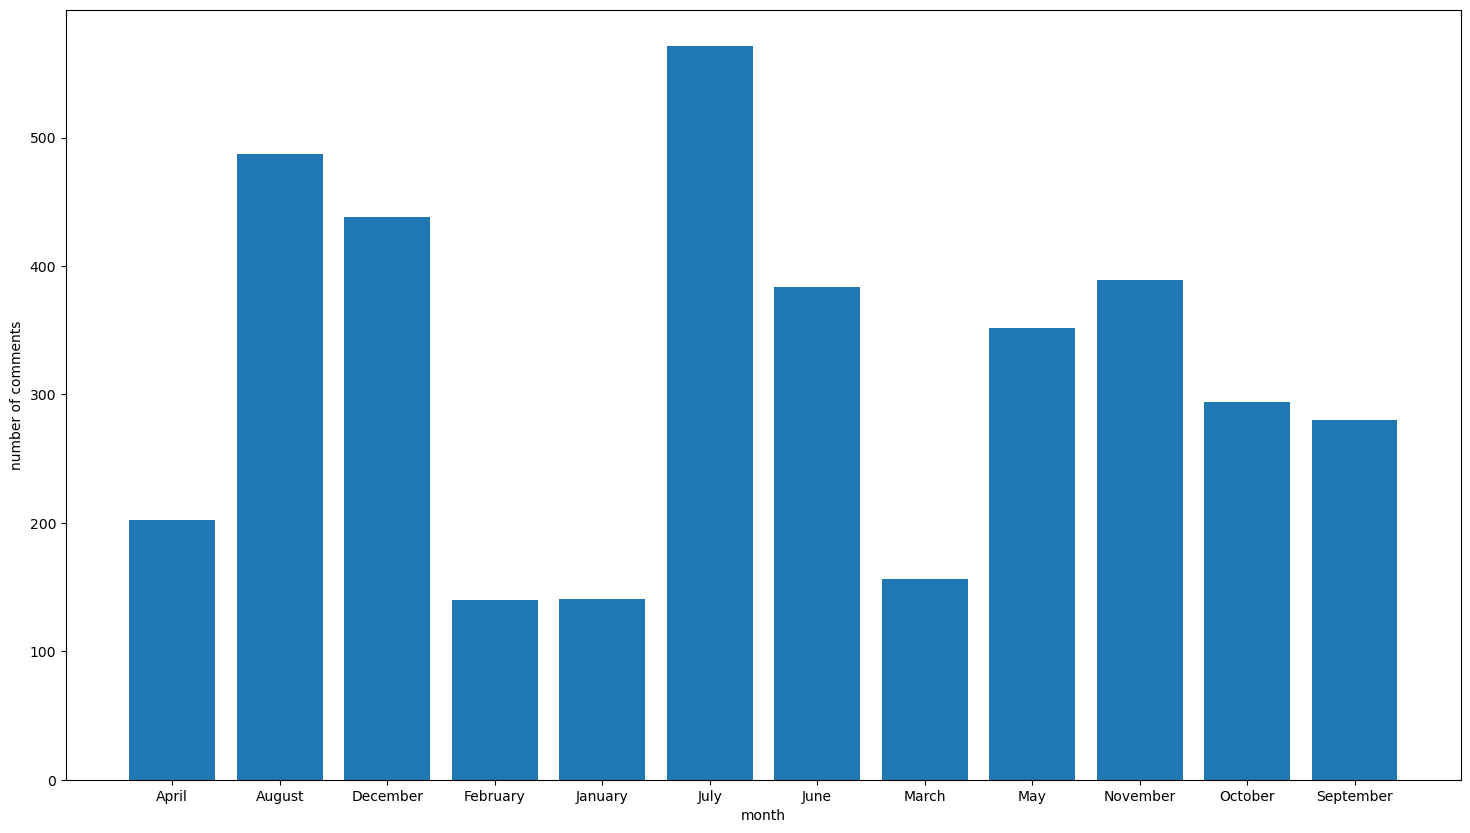

In [9]:
# Bar plot to visualize the number of comments per month i.e. people commented least in January, February and June

# As global events happening over a period of time, effects what people post, 
# so, word cloud can also be dependent on the period of time and further analysis can be done on time dependence.

fig, ax = plt.subplots(figsize = (18,10))

# Get the number of comments per month
comments_per_month = df.groupby('month')['num_comments'].sum()

# Create the bar plot
ax.bar(comments_per_month.index, comments_per_month.values)

# x-axis label
ax.set_xlabel('month')

# y-axis label
ax.set_ylabel('number of comments')

plt.show()

### Check missing values

In [10]:
df.isnull().sum()

# here 'body' column has 63 missing values

title            0
score            0
id               0
subreddit        0
url              0
num_comments     0
body            63
created          0
date             0
time             0
month            0
day              0
dtype: int64

### Check for duplicates or unique values

In [11]:
# count the number of unique values in each column
df.nunique()

# in 'title' column, there is some repetition but it is possible to have same title for different posts.

title           492
score            42
id              500
subreddit         1
url             500
num_comments     39
body            436
created         500
date            337
time            500
month            12
day               7
dtype: int64

In [12]:
# examples of repeated titles 
df["title"].value_counts()[0:4]

I need help                                                                                                                                                       3
Saving money tips                                                                                                                                                 2
Is saving $1000/month CAD a good starting point? Also paying $500/month to student loans. I’m 29 and I really only started to save :( advice and tips welcome!    2
What should I improve on?                                                                                                                                         2
Name: title, dtype: int64

In [13]:
df.head(2)

,title,score,id,subreddit,url,num_comments,body,created,date,time,month,day
0,Most Common Money Saving Tools: Do NOT Post Th...,24,calpl0,SavingMoney,https://www.reddit.com/r/SavingMoney/comments/...,7,In order to minimize the constant referral pos...,1.562596e+09,2019-07-08,16:27:08,July,Monday
1,"Heads up: If you post a Yotta referral, I'm ju...",77,jth9il,SavingMoney,https://www.reddit.com/r/SavingMoney/comments/...,0,I just cleared out the mod queue and HOLY CRAP...,1.605280e+09,2020-11-13,16:10:15,November,Friday


### Columns that doesn't contain any important info relevant for EDA can be removed

In [14]:
# columns that doesn't contain any important info relevant for EDA can be removed for now
df_subset = df.drop(columns=['subreddit', 'id'])

In [15]:
df_subset.loc[:,"title"][1]

"Heads up: If you post a Yotta referral, I'm just straight up permabanning you from the sub"

### Visualizing the distribution of 'score' and 'num_comments' columns along with the correlation

In [16]:
# can be used to find outliers as well

C:\Users\garim\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='score'>

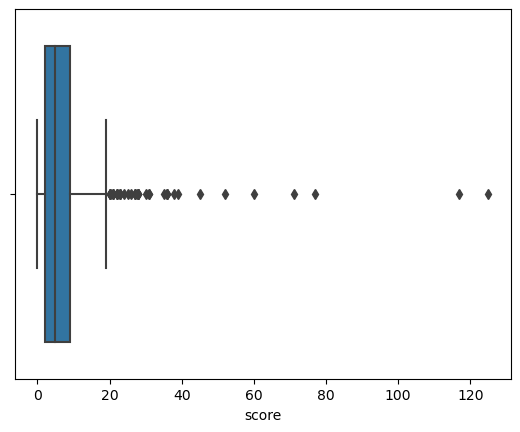

In [17]:
sns.boxplot(df_subset['score'])

C:\Users\garim\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='num_comments'>

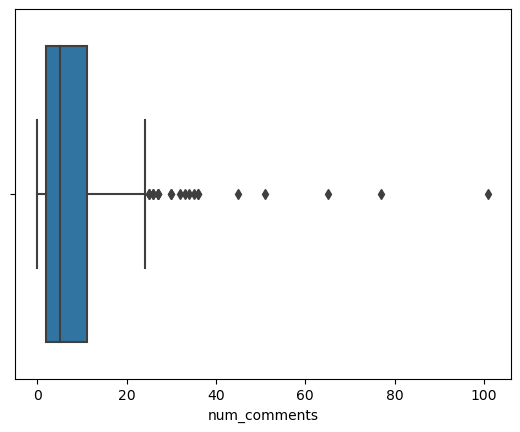

In [18]:
sns.boxplot(df['num_comments'])

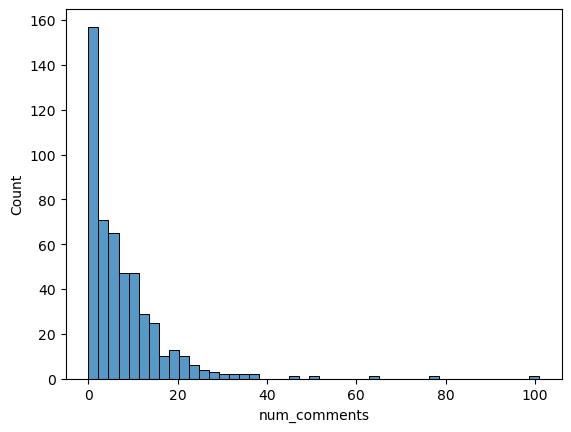

In [19]:
sns.histplot(x='num_comments', data=df, )
plt.show()

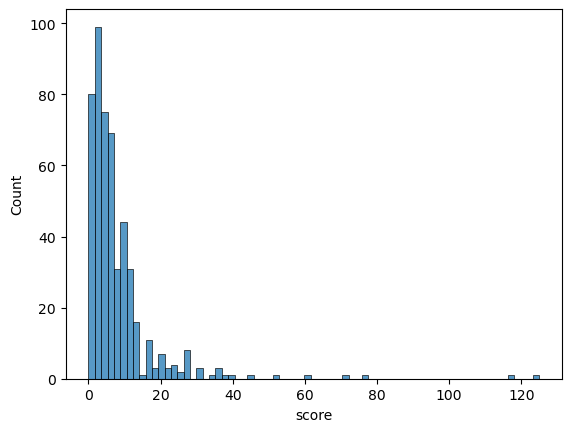

In [20]:
sns.histplot(x='score', data=df, )
plt.show()

<AxesSubplot:>

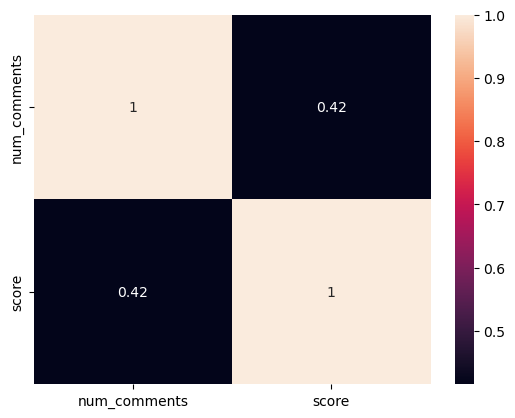

In [21]:
# Plot a heatmap to visualize correlations between the features
sns.heatmap(df_subset.loc[:,['num_comments','score']].corr(), annot=True)

In [22]:
#  can also identify and remove the outliers

## Text cleaning

In [23]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\garim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [24]:
import re
from nltk import word_tokenize, pos_tag
def get_wordnet_tag(tag):
    
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
    
#For example, if the input tag is 'ADJ', the function will return 'j'. 
#This indicates that the word in question is an adjective in WordNet.

In [25]:
def lemmatize_text(title):
    stop = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()

    words = list()
    title = word_tokenize(title)
    for word, tag in pos_tag(title):
        tag = get_wordnet_tag(tag)
        word = lemmatizer.lemmatize(word, tag)
        if word not in stop:
            words.append(word)
    
    return ' '.join(words)

In [26]:
import re
from nltk import word_tokenize, pos_tag

def clean_text(text):
    
    # Skip cleaning if the input is not a string
    if not isinstance(text, str):
        return text
    
    # Lowercase the text
    text = text.lower()

    # Replace URLs with the word 'link'
    pattern_link = r'https?://[^\s]+|www\.[^\s]+|[^\s]+\.com[^\s]*|[^\s]+\.org[^\s]*|[^\s]+\.html[^\s]*'
    text = re.sub(pattern_link, ' link ', text)

    # Remove punctuation
    #pattern_punctuation = r'[' + string.punctuation + '’]'
    #text = re.sub(pattern_punctuation, '', text)

    # Remove numbers that are not surrounded by words
    text = re.sub(r'(?<=\b)\d+(?=\b)', '', text)

    # Remove non-alphanumeric characters
    text = re.sub(r'[^\w\d\s]+', '', text)

    # Lemmatize the text using your lemmatize_text function
    text = lemmatize_text(text)

    # Remove multiple consecutive spaces
    text = re.sub(r'\s+', ' ', text)

    return text

def clean_text_column(dataset, column_name):
    new_column_name = column_name + "_cleaned"
    dataset[new_column_name] = dataset[column_name].apply(clean_text)


In [27]:
clean_text_column(df_subset, 'body')
clean_text_column(df_subset, 'title')

In [28]:
df_subset.head(3)

,title,score,url,num_comments,body,created,date,time,month,day,body_cleaned,title_cleaned
0,Most Common Money Saving Tools: Do NOT Post Th...,24,https://www.reddit.com/r/SavingMoney/comments/...,7,In order to minimize the constant referral pos...,1.562596e+09,2019-07-08,16:27:08,July,Monday,order minimize constant referral post thread s...,common money saving tool post thread promote
1,"Heads up: If you post a Yotta referral, I'm ju...",77,https://www.reddit.com/r/SavingMoney/comments/...,0,I just cleared out the mod queue and HOLY CRAP...,1.605280e+09,2020-11-13,16:10:15,November,Friday,clear mod queue holy crap jam full spammer,head post yotta referral im straight permabann...
2,Saving Money Challenge - Who wants to team up ...,5,https://www.reddit.com/r/SavingMoney/comments/...,0,Are you looking to join a saving money challe...,1.672066e+09,2022-12-26,15:53:46,December,Monday,look join save money challenge team others als...,save money challenge want team


In [29]:
# rearranging the order of columns
df_subset = df_subset.loc[:,['title', 'title_cleaned', 'body', 'body_cleaned', 'score',  'num_comments', 'date', 'time', 'month', 'day','created', 'url']]

In [30]:
df_subset.head(3)

,title,title_cleaned,body,body_cleaned,score,num_comments,date,time,month,day,created,url
0,Most Common Money Saving Tools: Do NOT Post Th...,common money saving tool post thread promote,In order to minimize the constant referral pos...,order minimize constant referral post thread s...,24,7,2019-07-08,16:27:08,July,Monday,1.562596e+09,https://www.reddit.com/r/SavingMoney/comments/...
1,"Heads up: If you post a Yotta referral, I'm ju...",head post yotta referral im straight permabann...,I just cleared out the mod queue and HOLY CRAP...,clear mod queue holy crap jam full spammer,77,0,2020-11-13,16:10:15,November,Friday,1.605280e+09,https://www.reddit.com/r/SavingMoney/comments/...
2,Saving Money Challenge - Who wants to team up ...,save money challenge want team,Are you looking to join a saving money challe...,look join save money challenge team others als...,5,0,2022-12-26,15:53:46,December,Monday,1.672066e+09,https://www.reddit.com/r/SavingMoney/comments/...


In [31]:
# zero comments (num_comments = 0) means no answers available, can think about how to deal with it later

### Word cloud

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def create_wordcloud(df, column_name):
    text = ' '.join(df[column_name].astype(str))
    wordcloud = WordCloud().generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

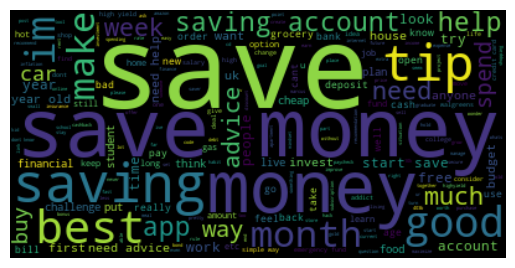

In [33]:
create_wordcloud(df_subset, 'title_cleaned')

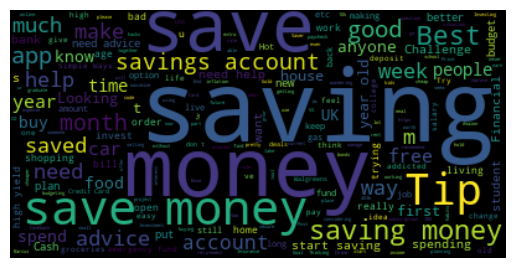

In [34]:
create_wordcloud(df, 'title')

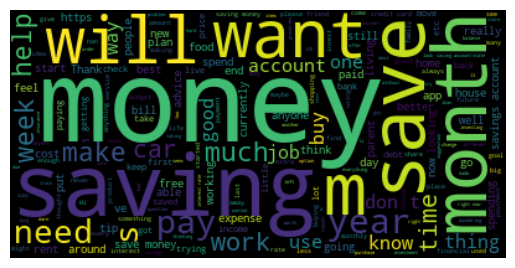

In [35]:
create_wordcloud(df_subset, 'body')

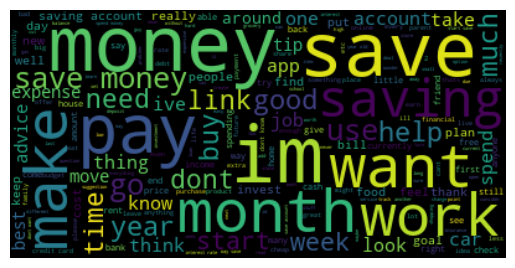

In [36]:
create_wordcloud(df_subset, 'body_cleaned')

### Most common words

In [37]:
def all_stopwords(stopwords_list):
    ''' return list of all the stopwords including common stop words in english and stopwords list by the user
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    # extend the default stopwords list by adding additional stopwords
    stopwords.extend(stopwords_list)
    return stopwords

def get_filtered_tokens(df, column_name, stopwords_list):
    ''' tokenize the elements of column of dataframe
    '''
    words_list = df[column_name].tolist()
    stop_words = all_stopwords(stopwords_list)
    tokens = [word_tokenize(i) for i in words_list]
    #error
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_tokens = [word for word in filtered_tokens if len(word) > 5]
    return filtered_tokens

def most_common_words(filtered_tokens, num_common_words):
    filtered_tokens = list(itertools.chain(*filtered_tokens))
    fdist = nltk.FreqDist(filtered_tokens)
    common_words = fdist.most_common(num_common_words)
    return common_words

In [38]:
#list of additional stopwords depending on the dataset
stopwords = ['im','cant', 'dont', 'get', 'etc', 'ha', 'could', 'u','hi'] # some error as the additional stopswords aren't removed

# Tokenization followed by filteration on the basis of stopwords i.e., get the tokens after removing the stopwords
filtered_tokens = get_filtered_tokens(df_subset, 'title_cleaned', stopwords)

# how many most common words to find
num_common_words = 300

# list of most common words
common_words = most_common_words(filtered_tokens, num_common_words)
print(common_words)

[('save', 89), ('money', 61), ('saving', 34), ('im', 24), ('month', 18), ('get', 18), ('account', 18), ('tip', 18), ('good', 17), ('help', 16), ('best', 16), ('need', 15), ('make', 14), ('start', 13), ('year', 12), ('work', 12), ('way', 12), ('time', 11), ('like', 10), ('car', 10), ('high', 10), ('much', 10), ('look', 10), ('advice', 10), ('financial', 9), ('want', 9), ('anyone', 8), ('people', 8), ('free', 8), ('put', 8), ('know', 8), ('dont', 7), ('really', 7), ('would', 7), ('try', 7), ('buy', 7), ('week', 7), ('spend', 7), ('app', 7), ('think', 7), ('bank', 7), ('live', 6), ('deposit', 6), ('yield', 6), ('use', 6), ('first', 6), ('etc', 6), ('still', 6), ('new', 6), ('uk', 6), ('cheap', 6), ('back', 6), ('fund', 6), ('consider', 5), ('old', 5), ('simple', 5), ('order', 5), ('interest', 5), ('job', 5), ('well', 5), ('feel', 5), ('rate', 5), ('home', 5), ('food', 5), ('bad', 5), ('student', 5), ('shop', 5), ('give', 5), ('u', 5), ('could', 5), ('take', 5), ('learn', 5), ('amount', 4)

## Separate the questions and answers based on '?' symbol

In [39]:
# create a boolean mask indicating which rows contain a question mark
mask = df_subset['title'].str.contains('\?')

question_rows = df_subset[mask]['title']

answer_rows = df_subset[~mask]['title']

In [40]:
def all_stopwords(stopwords_list):
    ''' return list of all the stopwords including common stop words in english and stopwords list by the user
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    # extend the default stopwords list by adding additional stopwords
    stopwords.extend(stopwords_list)
    return stopwords

In [41]:
def get_filtered_tokens(words_list, stopwords_list):
    # tokenize the elements of column of dataframe
    stop_words = all_stopwords(stopwords_list)
    tokens = [word_tokenize(i) for i in words_list]
    #error
    filtered_tokens = [word for word in tokens if word not in stop_words]
    filtered_tokens = [word for word in filtered_tokens if len(word) > 5]
    return filtered_tokens

In [42]:
def most_common_words(filtered_tokens, num_common_words):
    filtered_tokens = list(itertools.chain(*filtered_tokens))
    fdist = nltk.FreqDist(filtered_tokens)
    common_words = fdist.most_common(num_common_words)
    return common_words

In [43]:
#list of additional stopwords depending on the dataset
stopwords_list = ['im','cant', 'dont', 'get', 'etc', 'ha', 'could', 'u']

# Tokenization followed by filteration on the basis of stopwords i.e., get the tokens after removing the stopwords
filtered_tokens = get_filtered_tokens(answer_rows, stopwords_list)
print(filtered_tokens)

# how many most common words to find
num_common_words = 20

# list of most common words
common_words = most_common_words(filtered_tokens, num_common_words)
print(common_words)

[['Most', 'Common', 'Money', 'Saving', 'Tools', ':', 'Do', 'NOT', 'Post', 'Threads', 'Promoting', 'These'], ['Heads', 'up', ':', 'If', 'you', 'post', 'a', 'Yotta', 'referral', ',', 'I', "'m", 'just', 'straight', 'up', 'permabanning', 'you', 'from', 'the', 'sub'], ['What', 'is', 'your', 'New', 'Year', "'s", 'Resolution'], ['How', 'can', 'I', 'a', '14', 'year', 'old', 'save', 'the', 'most', 'money'], ['Hi', 'I', 'am', '23', ',', 'live', 'in', 'Australia', 'and', 'make', '$', '3500', 'a', 'month', '.', 'I', '’', 'm', 'able', 'to', 'save', 'roughly', '$', '1300', 'a', 'month', 'which', 'is', 'like', '15k', 'a', 'year', '.', 'I', 'just', 'don', '’', 't', 'get', 'how', 'I', '’', 'll', 'ever', 'be', 'able', 'able', 'to', 'save', 'for', 'a', 'car', 'or', 'a', 'house', 'ever', 'considering', 'a', 'down', 'deposit', 'it', 'like', 'over', '60k', '.', 'So', 'I', 'was', 'wondering', 'how', 'others', 'do', 'it/', 'how', 'to', 'grow', 'my', 'saving'], ['17', 'with', 'almost', '$', '30k', 'saved', 'al

## Text length

In [44]:
def text_length(dataset, column_name):
    ''' calculate the average length of words in the text eg: Answers
    by taking the sum of the lengths of all the answers in the dataset, divided by the total number of answers
    '''
    text_list = dataset[column_name].tolist()
    tokens = [word_tokenize(t) for t in text_list if isinstance(t, str)]
    lengths = [len(t) for t in tokens]
    avg_length = round(sum(lengths) / len(lengths))
    max_length = max(lengths)
    min_length = min(lengths)
    return avg_length, max_length, min_length

In [51]:
avg_length, max_length, min_length = text_length(df_subset, 'title_cleaned')
print('Average length is:', avg_length)
print(f'Maximum and minimum length is {max_length} and {min_length}')

# recheck if it's actually o

Average length is: 6
Maximum and minimum length is 31 and 0


In [52]:
avg_length, max_length, min_length = text_length(df_subset, 'title')
print('Average length is:', avg_length)
print(f'Maximum and minimum length is {max_length} and {min_length}')

Average length is: 11
Maximum and minimum length is 78 and 1


In [53]:
avg_length, max_length, min_length = text_length(df_subset, 'body_cleaned')
print('Average length is:', avg_length)
print(f'Maximum and minimum length is {max_length} and {min_length}')

Average length is: 59
Maximum and minimum length is 760 and 1


In [54]:
avg_length, max_length, min_length = text_length(df_subset, 'body')
print('Average length is:', avg_length)
print(f'Maximum and minimum length is {max_length} and {min_length}')

Average length is: 140
Maximum and minimum length is 1689 and 3


## Vocab size

In [55]:
def calculate_vocab_size(dataset, column_name):
    ''' calculate the vocabulary size
    '''
    text_list = dataset[column_name].tolist()
    tokens = [word_tokenize(t) for t in text_list if isinstance(t, str)]
    vocab = set([word for t in tokens for word in t])
    vocab_size = len(vocab)
    print(vocab_size) # without stopwords

In [56]:
vocab_size_title = calculate_vocab_size(df_subset, 'title_cleaned')
vocab_size_body = calculate_vocab_size(df_subset, 'body_cleaned')

885
3632
